In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from func_pickle import *
import cmocean
%matplotlib inline

In [2]:
load_path_bathy = '/data/soccom/GRID_12/'

f = h5py.File(load_path_bathy + 'grid.mat','r')
bathy = np.array(f.get('Depth'))

lon_min   = 1320 
lon_max   = 3601 
lat_min   = 0 
lat_max   = 1202 

load_path2 = '/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')

Y_bat           = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,05
X_bat           = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 270,04
X_bat, Y_bat    = np.meshgrid(X_bat, Y_bat)
bathy = bathy[lat_min:lat_max, lon_min:lon_max]

In [3]:
# On selectionne la bonne taille de hFacC == taille de "bigger domain"
lon_min   = 1440 
lon_max   = 3241
lat_min   = 0 
lat_max   = 1024

YC        = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,05
XC        = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 270,04
XC, YC    = np.meshgrid(XC, YC)

In [4]:
southern_front = pickle_load('ACC_southern_front', '/data/ebent/', verbose=False)

In [5]:
BIG_SF = pickle_load('SF_3', '/data/ebent/', verbose=False)

In [6]:
W_boundary = 12 # 121,04 degrees
E_boundary = 1560 # 250,04 degrees

In [7]:
look_index = np.where(southern_front[:,W_boundary]==0)[0]
look_index2 = np.where(southern_front[:,E_boundary]==0)[0]
tmp = np.ones(look_index[0])*W_boundary
tmp2 = np.ones(look_index2[0])*E_boundary

In [8]:
min_lon, max_lon = 180., 230.
min_lat, max_lat = -69., -67.
scale = 100.
range_lon = (max_lon-min_lon)/scale
range_lat = (max_lat-min_lat)/scale
lon = np.arange(min_lon, max_lon, range_lon)
lat = np.arange(min_lat, max_lat, range_lat)
lon,lat = np.meshgrid(lon,lat)

In [9]:
# Create box of initial release : 
XC_box = XC[0,720:1320] # de 180 à 230 deg
YC_box = YC[390:454,0] # de -69 à -67 deg

lower_line = np.ones(XC_box.shape) * min_lat
upper_line = np.ones(XC_box.shape) * max_lat
left_line  = np.ones(YC_box.shape) * min_lon
right_line = np.ones(YC_box.shape) * max_lon

In [10]:
box = [left_line, right_line, lower_line, upper_line]

In [17]:
def plot_fig1(title, save=False, title_save=None):
    plt.rcParams['contour.negative_linestyle'] = 'solid'
    fig     = plt.figure(figsize=(30,(30./190.)*53))
    m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-25.,llcrnrlon=110.,urcrnrlon=300.,lat_ts=-60.,resolution='l')    
    #plt.title(title, fontsize=18, y=1.02)    


    # Plot the stream function in contourf
    xm, ym  = m(X_bat, Y_bat)                  # use np.int_ for levels to have integers on cbar
    im      = m.contourf(xm, ym, BIG_SF, levels=np.int_(np.arange(-50, 180,10)), extend='both', cmap=cmocean.cm.amp)
    cbar    = m.colorbar(im, pad='2%', size='3%')
    cbar.set_label('Stream function [Sv]', fontsize=20)
    
    # Plot the stream function in contourf
    xm, ym  = m(X_bat, Y_bat)                  # use np.int_ for levels to have integers on cbar
    cs      = m.contour(xm, ym, BIG_SF, extend='both', levels=np.arange(-50, 180,10), colors='k', linewidth=0.1)
    #plt.clabel(cs, inline=True, fontsize=8)
    
    m.fillcontinents(color='k', lake_color='k')
    m.drawparallels(np.arange(-80.,-20.,10), labels=[1, 0, 0, 0], labelstyle='+/-')
    m.drawmeridians(np.arange(140.,301.,40), labels=[0, 0, 0, 1], labelstyle='+/-')
    m.drawcoastlines()
    
    # Plot the bathy
    xm, ym  = m(X_bat, Y_bat)
    cs      = m.contour(xm, ym, bathy, extend='both', levels=[3000], colors='grey', linewidth=0.1)
    
    # Plot the front, stopped at E and W boundaries
    xm, ym  = m(XC[:,W_boundary:E_boundary], YC[:,W_boundary:E_boundary])
    im      = m.contour(xm, ym, southern_front[:,W_boundary:E_boundary], colors='b', linewidths=4)
    
    # Plot the initialisation box
    for i, elem in enumerate(box):
        if i==0 or i==1:
            xm, ym  = m(box[i], YC_box)
            m.plot(xm, ym, '-', color='yellow', linewidth=4)
        if i==2 or i==3:
            xm, ym  = m(XC_box, box[i])
            m.plot(xm, ym, '-', color='yellow', linewidth=4)    

    # Plot the E_boundary and W_boundary
    xm, ym  = m(XC[:660,W_boundary], YC[:look_index[0],0])
    m.plot(xm, ym, '-', color='b', linewidth=4)
    xm, ym  = m(XC[:557,E_boundary], YC[:look_index2[0],0])
    m.plot(xm, ym, '-', color='b', linewidth=4)
        
    if save == True:
        plt.savefig('/home/ebent/Final_figs/' + title_save, bbox_inches='tight')#, format='pdf') #  dpi=1000,

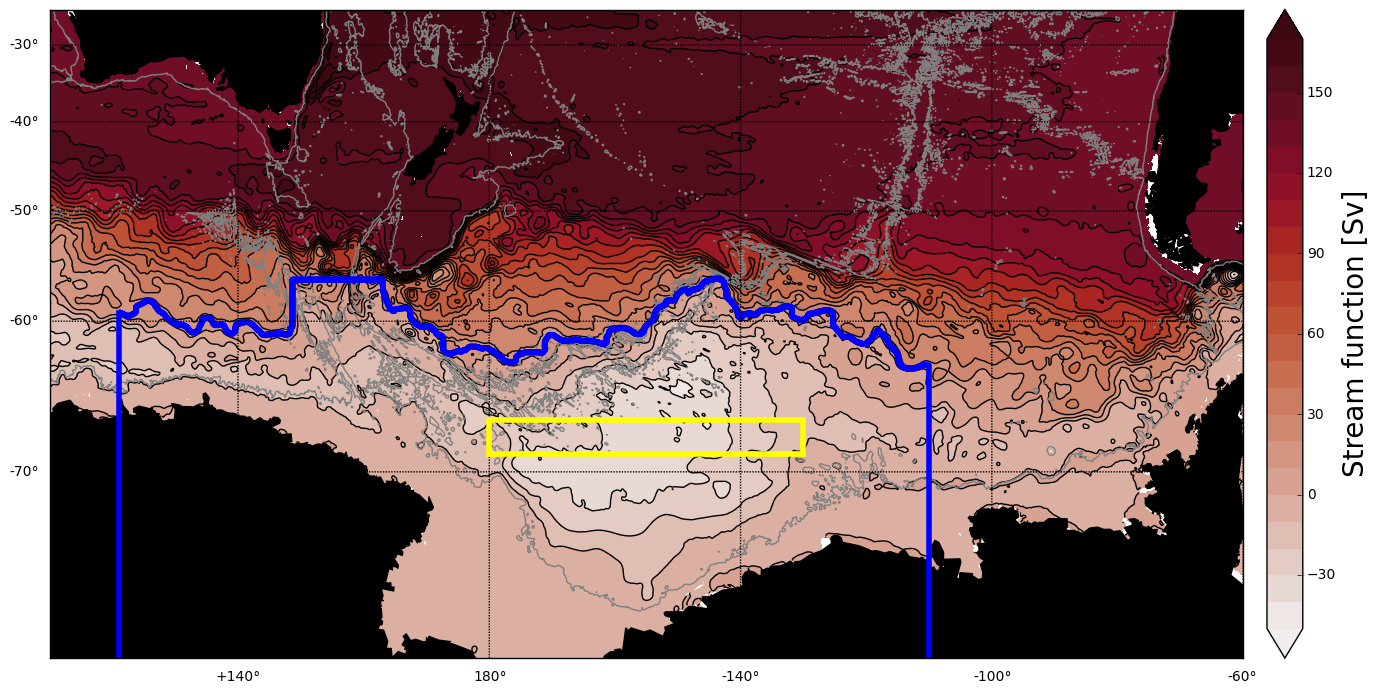

In [14]:
plot_fig1('Fig 1', save=True, title_save='map_region.png')

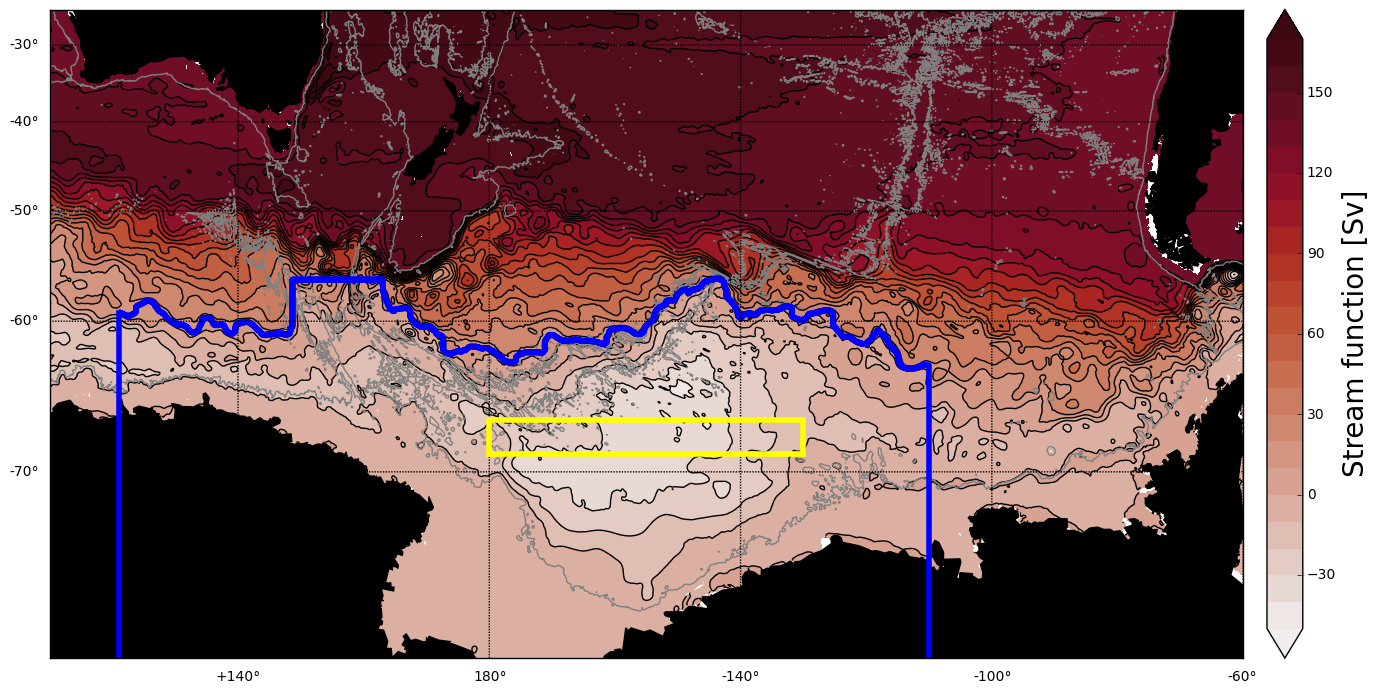

In [14]:
plot_fig1('Fig 1', save=True, title_save='map_region.png')